<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import sklearn.metrics
from sklearn.model_selection import train_test_split
import optuna

In [2]:
os.listdir('data')

['test.csv', 'train.csv', 'sample_submission.csv']

In [3]:
train_path = os.path.join('data', 'train.csv')
test_path = os.path.join('data', 'test.csv')

In [4]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [5]:
def data_look(df):
    display(df.info())
    print()
    display(df.isna().sum())
    print()
    display(df.describe())
    print()
    display(df.head())

In [6]:
data_look(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

None

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [7]:
train.shape

(26457, 20)

In [8]:
test.shape

(10000, 19)

In [9]:
for col in train.columns:
    print(f'column: {col}')
    print(f'unique 수: {train[col].nunique()}')
    print()

column: index
unique 수: 26457

column: gender
unique 수: 2

column: car
unique 수: 2

column: reality
unique 수: 2

column: child_num
unique 수: 9

column: income_total
unique 수: 249

column: income_type
unique 수: 5

column: edu_type
unique 수: 5

column: family_type
unique 수: 5

column: house_type
unique 수: 6

column: DAYS_BIRTH
unique 수: 6621

column: DAYS_EMPLOYED
unique 수: 3470

column: FLAG_MOBIL
unique 수: 1

column: work_phone
unique 수: 2

column: phone
unique 수: 2

column: email
unique 수: 2

column: occyp_type
unique 수: 18

column: family_size
unique 수: 10

column: begin_month
unique 수: 61

column: credit
unique 수: 3



In [10]:
for col in test.columns:
    print(f'column: {col}')
    print(f'unique 수: {test[col].nunique()}')
    print()

column: index
unique 수: 10000

column: gender
unique 수: 2

column: car
unique 수: 2

column: reality
unique 수: 2

column: child_num
unique 수: 6

column: income_total
unique 수: 208

column: income_type
unique 수: 5

column: edu_type
unique 수: 5

column: family_type
unique 수: 5

column: house_type
unique 수: 6

column: DAYS_BIRTH
unique 수: 4675

column: DAYS_EMPLOYED
unique 수: 2665

column: FLAG_MOBIL
unique 수: 1

column: work_phone
unique 수: 2

column: phone
unique 수: 2

column: email
unique 수: 2

column: occyp_type
unique 수: 18

column: family_size
unique 수: 7

column: begin_month
unique 수: 61



In [11]:
bin_cols = ['gender', 'car', 'reality', 'work_phone', 'phone', 'email']
cat_cols = ['child_num', 'family_size', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'credit']
con_cols = ['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']

In [12]:
for col in bin_cols:
    print(train[col].value_counts())
    print()

F    17697
M     8760
Name: gender, dtype: int64

N    16410
Y    10047
Name: car, dtype: int64

Y    17830
N     8627
Name: reality, dtype: int64

0    20511
1     5946
Name: work_phone, dtype: int64

0    18672
1     7785
Name: phone, dtype: int64

0    24042
1     2415
Name: email, dtype: int64



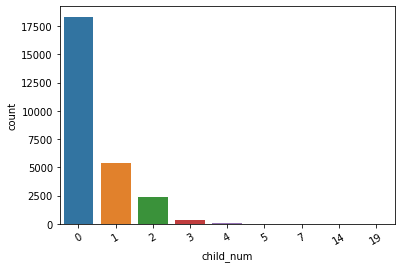

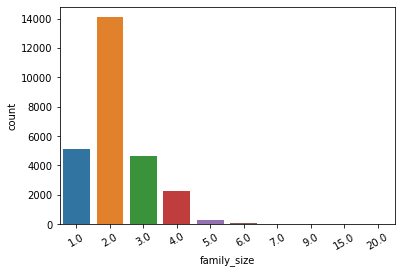

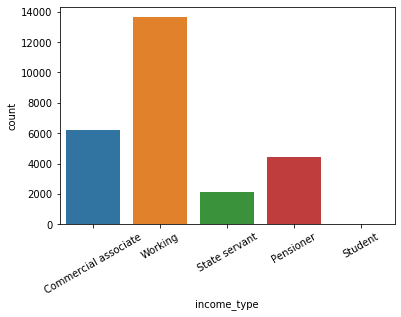

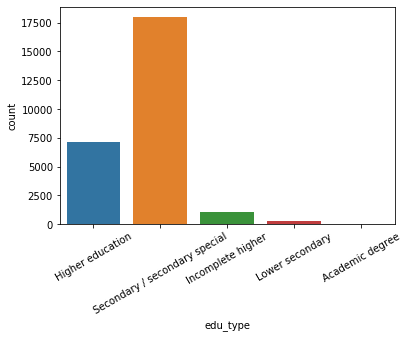

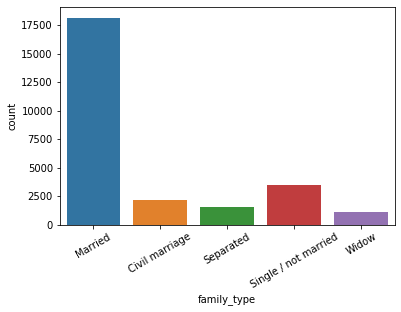

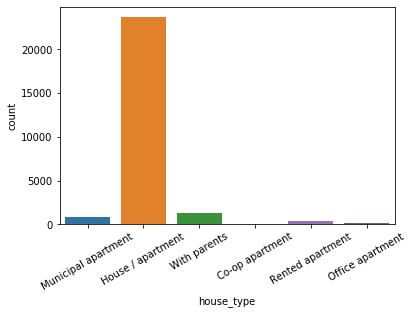

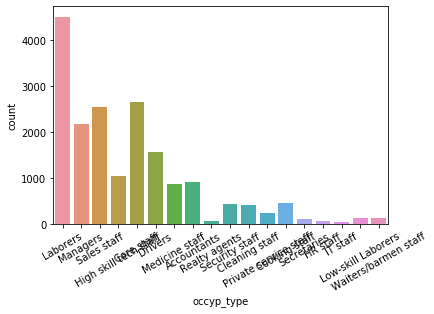

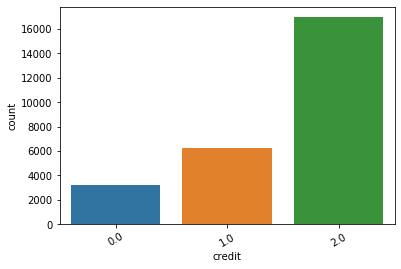

In [13]:
for col in cat_cols:
    sns.countplot(train[col])
    plt.xticks(rotation=30)
    plt.show()

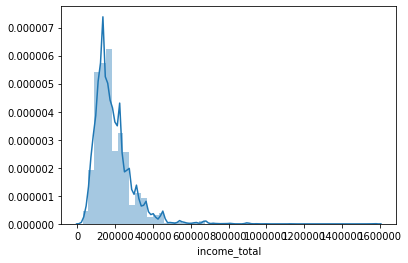

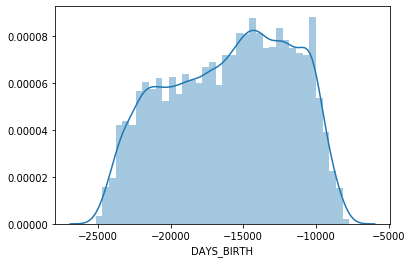

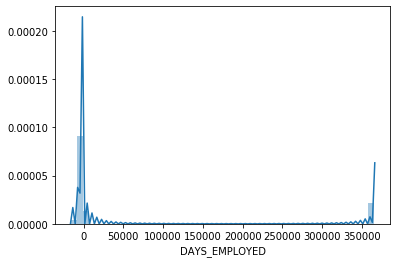

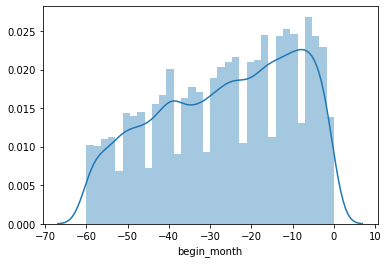

In [14]:
for col in con_cols:
    sns.distplot(train[col])
    plt.show()

In [15]:
data = pd.concat([train.drop('credit', axis=1), test]).reset_index(drop=True)

In [16]:
data['gender'] = data['gender'].replace(['F','M'],[0,1])
data['car'] = data['car'].replace(['N','Y'],[0,1])
data['reality'] = data['reality'].replace(['N','Y'],[0,1])

In [17]:
le = LabelEncoder()
data['income_type'] = le.fit_transform(data['income_type'])
data['edu_type'] = le.fit_transform(data['edu_type'])
data['family_type'] = le.fit_transform(data['family_type'])
data['house_type'] = le.fit_transform(data['house_type'])

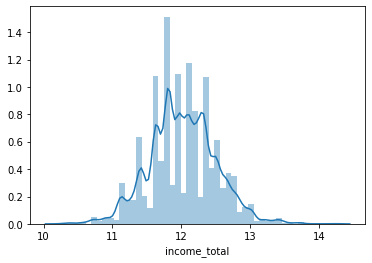

In [18]:
data['income_total'] = np.log1p(data['income_total'])
sns.distplot(data['income_total'])

In [19]:
# 나이
data['age'] = -1 * (data['DAYS_BIRTH'] // 365)
# 근속 연수
data['work_period'] = round(-1 * (data['DAYS_EMPLOYED'] / 365), 2)
# 신용카드 사용 기간
data['card_period'] = round(-1 * (data['begin_month'] / 12), 2)

In [20]:
data.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'age', 'work_period',
       'card_period'],
      dtype='object')

In [21]:
data.drop(['index', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'occyp_type', 'begin_month'], axis=1, inplace=True)

In [22]:
x_train = data[:len(train)]
y_train = train['credit']
x_test = data[len(train):].reset_index(drop=True)

In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(26457, 16)
(26457,)
(10000, 16)


In [24]:
x_train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,work_phone,phone,email,family_size,age,work_period,card_period
0,0,0,0,0,12.218500,0,1,1,2,0,0,0,2.0,39,12.90,0.50
1,0,0,1,1,12.419170,0,4,0,1,0,0,1,3.0,32,4.22,0.42
2,1,1,1,0,13.017005,4,1,1,1,0,1,0,2.0,53,12.15,1.83
3,0,0,1,0,12.218500,0,4,1,1,0,1,0,2.0,42,5.73,3.08
4,0,1,1,0,11.967187,2,1,1,1,0,0,0,2.0,42,5.77,2.17


In [31]:
def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(x_train, y_train, test_size=0.25)
    dtrain = lgb.Dataset(train_x, label=train_y)

    param = {
        "metric": "logloss",
        "verbosity": -1,
        'force_row_wise': True,
        'random_state': 130,
        'verbose': -1,
        'tree_learner': 'voting',
        'boosting': 'gbdt',
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.1),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 1.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 1.0),
        'num_leaves': trial.suggest_int('num_leaves', 31, 511),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.3, 0.7),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.7, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 11),
        'min_child_samples': trial.suggest_int('min_child_samples', 2, 64),
    }

    gbm = lgb.train(param, dtrain)
    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(valid_y, pred_labels)
    return accuracy

In [32]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print('Best Value:', study.best_value)
print('Best trial:', study.best_trial.params)

[I 2021-05-10 13:08:19,394] A new study created in memory with name: no-name-0e8a2ad2-59b0-453a-9810-9ff8b95fc384
[I 2021-05-10 13:08:20,576] Trial 0 finished with value: 0.6447467876039304 and parameters: {'learning_rate': 0.05422982271848717, 'lambda_l1': 6.634764805661425e-07, 'lambda_l2': 6.436556659261455e-07, 'num_leaves': 433, 'feature_fraction': 0.4547614542425343, 'bagging_fraction': 0.9318606970097014, 'bagging_freq': 3, 'min_child_samples': 2}. Best is trial 0 with value: 0.6447467876039304.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:21,399] Trial 1 finished with value: 0.6120937263794407 and parameters: {'learning_rate': 0.06596250669214736, 'lambda_l1': 0.0011410539602068669, 'lambda_l2': 0.002775749850523715, 'num_leaves': 468, 'feature_fraction': 0.4711809288297142, 'bagging_fraction': 0.8877512921571148, 'bagging_freq': 9, 'min_child_samples': 31}. Best is trial 0 with value: 0.6447467876039304.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:22,027] Trial 2 finished with value: 0.6078609221466365 and parameters: {'learning_rate': 0.07159917203305602, 'lambda_l1': 0.0028127563383800705, 'lambda_l2': 3.673254346520624e-05, 'num_leaves': 287, 'feature_fraction': 0.36770427868631866, 'bagging_fraction': 0.8355712810289884, 'bagging_freq': 3, 'min_child_samples': 37}. Best is trial 0 with value: 0.6447467876039304.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:22,823] Trial 3 finished with value: 0.6232804232804233 and parameters: {'learning_rate': 0.03179591112798519, 'lambda_l1': 6.208010600939882e-08, 'lambda_l2': 0.052002717605146624, 'num_leaves': 399, 'feature_fraction': 0.4117566962076686, 'bagging_fraction': 0.9875439927357654, 'bagging_freq': 4, 'min_child_samples': 32}. Best is trial 0 with value: 0.6447467876039304.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:23,269] Trial 4 finished with value: 0.6436885865457294 and parameters: {'learning_rate': 0.014867107299275996, 'lambda_l1': 1.4269664562676447e-07, 'lambda_l2': 0.00021035544323055167, 'num_leaves': 156, 'feature_fraction': 0.4718186609589628, 'bagging_fraction': 0.946221060575016, 'bagging_freq': 10, 'min_child_samples': 54}. Best is trial 0 with value: 0.6447467876039304.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:23,757] Trial 5 finished with value: 0.6143613000755858 and parameters: {'learning_rate': 0.06929545895785483, 'lambda_l1': 5.470361023486142e-06, 'lambda_l2': 3.8053757952286633e-06, 'num_leaves': 234, 'feature_fraction': 0.3188523873132173, 'bagging_fraction': 0.8182320094247721, 'bagging_freq': 7, 'min_child_samples': 23}. Best is trial 0 with value: 0.6447467876039304.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:24,514] Trial 6 finished with value: 0.6220710506424793 and parameters: {'learning_rate': 0.03869808122092074, 'lambda_l1': 0.0033949327750948024, 'lambda_l2': 6.7336393180314e-05, 'num_leaves': 459, 'feature_fraction': 0.42363983069113653, 'bagging_fraction': 0.7379264566558437, 'bagging_freq': 4, 'min_child_samples': 38}. Best is trial 0 with value: 0.6447467876039304.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:25,100] Trial 7 finished with value: 0.6093726379440665 and parameters: {'learning_rate': 0.07950572689991997, 'lambda_l1': 0.00044245161803221607, 'lambda_l2': 0.0002898771484655777, 'num_leaves': 197, 'feature_fraction': 0.68175083590602, 'bagging_fraction': 0.8311900933951794, 'bagging_freq': 1, 'min_child_samples': 25}. Best is trial 0 with value: 0.6447467876039304.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:25,688] Trial 8 finished with value: 0.6086167800453515 and parameters: {'learning_rate': 0.06873073406929815, 'lambda_l1': 2.1558034580674455e-08, 'lambda_l2': 4.542755246854405e-08, 'num_leaves': 324, 'feature_fraction': 0.4956438448858166, 'bagging_fraction': 0.927716218279409, 'bagging_freq': 6, 'min_child_samples': 50}. Best is trial 0 with value: 0.6447467876039304.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:26,308] Trial 9 finished with value: 0.636583522297808 and parameters: {'learning_rate': 0.028693826184827555, 'lambda_l1': 1.3707376886756732e-05, 'lambda_l2': 0.734478761106723, 'num_leaves': 217, 'feature_fraction': 0.5930167566927029, 'bagging_fraction': 0.9579956015594698, 'bagging_freq': 8, 'min_child_samples': 21}. Best is trial 0 with value: 0.6447467876039304.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:26,791] Trial 10 finished with value: 0.6326530612244898 and parameters: {'learning_rate': 0.09681674734968214, 'lambda_l1': 0.13988640895960405, 'lambda_l2': 1.1593279779001312e-08, 'num_leaves': 43, 'feature_fraction': 0.6127731261631353, 'bagging_fraction': 0.7657717995853643, 'bagging_freq': 1, 'min_child_samples': 6}. Best is trial 0 with value: 0.6447467876039304.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:27,275] Trial 11 finished with value: 0.6562358276643991 and parameters: {'learning_rate': 0.010702962992649962, 'lambda_l1': 4.929982239493498e-07, 'lambda_l2': 7.853377993113897e-07, 'num_leaves': 105, 'feature_fraction': 0.5459423833878064, 'bagging_fraction': 0.9148149201286859, 'bagging_freq': 11, 'min_child_samples': 61}. Best is trial 11 with value: 0.6562358276643991.
[I 2021-05-10 13:08:27,466] Trial 12 finished with value: 0.635827664399093 and parameters: {'learning_rate': 0.04797753926295646, 'lambda_l1': 8.198232662777835e-07, 'lambda_l2': 5.608725327636532e-07, 'num_leaves': 53, 'feature_fraction': 0.5707110004368006, 'bagging_fraction': 0.8858866746984613, 'bagging_freq': 11, 'min_child_samples': 64}. Best is trial 11 with value: 0.6562358276643991.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:27,880] Trial 13 finished with value: 0.6696900982615268 and parameters: {'learning_rate': 0.010459509180589042, 'lambda_l1': 3.900318933592115e-06, 'lambda_l2': 6.538053962047043e-07, 'num_leaves': 113, 'feature_fraction': 0.5545349388344342, 'bagging_fraction': 0.9005803953602178, 'bagging_freq': 3, 'min_child_samples': 2}. Best is trial 13 with value: 0.6696900982615268.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:28,532] Trial 14 finished with value: 0.6498866213151927 and parameters: {'learning_rate': 0.013190736483988993, 'lambda_l1': 2.6005347070377194e-05, 'lambda_l2': 1.3416944568635097e-07, 'num_leaves': 111, 'feature_fraction': 0.5419047141239453, 'bagging_fraction': 0.8800295129847704, 'bagging_freq': 5, 'min_child_samples': 11}. Best is trial 13 with value: 0.6696900982615268.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:28,985] Trial 15 finished with value: 0.6412698412698413 and parameters: {'learning_rate': 0.010632148256718151, 'lambda_l1': 2.8961263549747856e-06, 'lambda_l2': 3.853077556782233e-06, 'num_leaves': 105, 'feature_fraction': 0.6613508323560517, 'bagging_fraction': 0.9927477342383677, 'bagging_freq': 2, 'min_child_samples': 61}. Best is trial 13 with value: 0.6696900982615268.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:29,379] Trial 16 finished with value: 0.6396069538926682 and parameters: {'learning_rate': 0.0227650330653443, 'lambda_l1': 4.943982995531026e-05, 'lambda_l2': 1.4939417998875977e-08, 'num_leaves': 108, 'feature_fraction': 0.5355033310929189, 'bagging_fraction': 0.9054974579680402, 'bagging_freq': 11, 'min_child_samples': 44}. Best is trial 13 with value: 0.6696900982615268.
[I 2021-05-10 13:08:29,527] Trial 17 finished with value: 0.6625850340136055 and parameters: {'learning_rate': 0.020221543246606306, 'lambda_l1': 1.2086175775537867e-08, 'lambda_l2': 5.961923443866066e-06, 'num_leaves': 34, 'feature_fraction': 0.6413632746015149, 'bagging_fraction': 0.8036089260921051, 'bagging_freq': 6, 'min_child_samples': 14}. Best is trial 13 with value: 0.6696900982615268.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:29,755] Trial 18 finished with value: 0.653968253968254 and parameters: {'learning_rate': 0.021741796858567523, 'lambda_l1': 1.099273049345566e-08, 'lambda_l2': 1.105810530436054e-05, 'num_leaves': 55, 'feature_fraction': 0.6439593441558804, 'bagging_fraction': 0.7972450125521945, 'bagging_freq': 6, 'min_child_samples': 14}. Best is trial 13 with value: 0.6696900982615268.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:30,261] Trial 19 finished with value: 0.6426303854875284 and parameters: {'learning_rate': 0.04169576661050782, 'lambda_l1': 0.08129764997831831, 'lambda_l2': 0.002023504887342821, 'num_leaves': 161, 'feature_fraction': 0.6243365756029302, 'bagging_fraction': 0.7853127403670279, 'bagging_freq': 7, 'min_child_samples': 2}. Best is trial 13 with value: 0.6696900982615268.
[I 2021-05-10 13:08:30,441] Trial 20 finished with value: 0.6559334845049131 and parameters: {'learning_rate': 0.021572888060607424, 'lambda_l1': 0.00028594385762479175, 'lambda_l2': 6.323739323780668e-08, 'num_leaves': 34, 'feature_fraction': 0.5825820432707954, 'bagging_fraction': 0.8659511820384556, 'bagging_freq': 5, 'min_child_samples': 15}. Best is trial 13 with value: 0.6696900982615268.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:30,955] Trial 21 finished with value: 0.671201814058957 and parameters: {'learning_rate': 0.011346992397809338, 'lambda_l1': 2.2744997692056727e-07, 'lambda_l2': 4.408130470473168e-07, 'num_leaves': 97, 'feature_fraction': 0.544741683715109, 'bagging_fraction': 0.7083829304833746, 'bagging_freq': 9, 'min_child_samples': 5}. Best is trial 21 with value: 0.671201814058957.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:31,433] Trial 22 finished with value: 0.6542705971277399 and parameters: {'learning_rate': 0.018097424992518624, 'lambda_l1': 9.347605502182371e-08, 'lambda_l2': 2.635007664185348e-06, 'num_leaves': 146, 'feature_fraction': 0.6944433900702798, 'bagging_fraction': 0.713401309979973, 'bagging_freq': 9, 'min_child_samples': 8}. Best is trial 21 with value: 0.671201814058957.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:31,753] Trial 23 finished with value: 0.6494331065759638 and parameters: {'learning_rate': 0.029801777740552628, 'lambda_l1': 1.1447232892575733e-08, 'lambda_l2': 1.5983892990932088e-05, 'num_leaves': 78, 'feature_fraction': 0.5092061254978575, 'bagging_fraction': 0.7073756397201569, 'bagging_freq': 8, 'min_child_samples': 2}. Best is trial 21 with value: 0.671201814058957.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:32,001] Trial 24 finished with value: 0.6781557067271353 and parameters: {'learning_rate': 0.01047101889904306, 'lambda_l1': 2.825709624714035e-06, 'lambda_l2': 1.6022514152728585e-07, 'num_leaves': 32, 'feature_fraction': 0.5641738737927232, 'bagging_fraction': 0.7445090906474511, 'bagging_freq': 5, 'min_child_samples': 16}. Best is trial 24 with value: 0.6781557067271353.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:32,691] Trial 25 finished with value: 0.6477702191987906 and parameters: {'learning_rate': 0.011729003503481869, 'lambda_l1': 4.18715861927858e-06, 'lambda_l2': 2.08479498883321e-07, 'num_leaves': 180, 'feature_fraction': 0.5150967516393449, 'bagging_fraction': 0.732419241696756, 'bagging_freq': 4, 'min_child_samples': 19}. Best is trial 24 with value: 0.6781557067271353.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:33,105] Trial 26 finished with value: 0.6240362811791383 and parameters: {'learning_rate': 0.09865720436933663, 'lambda_l1': 1.3555353695120455e-06, 'lambda_l2': 1.498687671573088e-08, 'num_leaves': 82, 'feature_fraction': 0.5589000407200896, 'bagging_fraction': 0.7619142517257249, 'bagging_freq': 2, 'min_child_samples': 7}. Best is trial 24 with value: 0.6781557067271353.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:33,837] Trial 27 finished with value: 0.6479213907785336 and parameters: {'learning_rate': 0.036688787395456925, 'lambda_l1': 2.467863232892742e-07, 'lambda_l2': 2.7110113134987057e-07, 'num_leaves': 257, 'feature_fraction': 0.595121579579816, 'bagging_fraction': 0.7338115091097586, 'bagging_freq': 5, 'min_child_samples': 2}. Best is trial 24 with value: 0.6781557067271353.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:34,742] Trial 28 finished with value: 0.636281179138322 and parameters: {'learning_rate': 0.027859499996523925, 'lambda_l1': 1.46919620969134e-05, 'lambda_l2': 4.696731446476017e-08, 'num_leaves': 138, 'feature_fraction': 0.5246773066911999, 'bagging_fraction': 0.7620532163544587, 'bagging_freq': 3, 'min_child_samples': 9}. Best is trial 24 with value: 0.6781557067271353.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:35,547] Trial 29 finished with value: 0.6169312169312169 and parameters: {'learning_rate': 0.04687074967433071, 'lambda_l1': 9.701459618334591e-05, 'lambda_l2': 9.82380290537214e-07, 'num_leaves': 348, 'feature_fraction': 0.4452288368352372, 'bagging_fraction': 0.8503814041065085, 'bagging_freq': 2, 'min_child_samples': 26}. Best is trial 24 with value: 0.6781557067271353.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:35,774] Trial 30 finished with value: 0.6272108843537415 and parameters: {'learning_rate': 0.05926442381178855, 'lambda_l1': 1.926788906942061e-06, 'lambda_l2': 1.1116939416071687e-06, 'num_leaves': 75, 'feature_fraction': 0.48310061744844435, 'bagging_fraction': 0.7103529878270297, 'bagging_freq': 3, 'min_child_samples': 17}. Best is trial 24 with value: 0.6781557067271353.
[I 2021-05-10 13:08:35,916] Trial 31 finished with value: 0.6790627362055933 and parameters: {'learning_rate': 0.010082723246623976, 'lambda_l1': 4.2521429162174644e-08, 'lambda_l2': 1.4666971817104982e-05, 'num_leaves': 31, 'feature_fraction': 0.6208305206572056, 'bagging_fraction': 0.8010646949918658, 'bagging_freq': 5, 'min_child_samples': 4}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:36,142] Trial 32 finished with value: 0.6739229024943311 and parameters: {'learning_rate': 0.010012881811544402, 'lambda_l1': 4.455037740167047e-08, 'lambda_l2': 2.704550966192929e-07, 'num_leaves': 74, 'feature_fraction': 0.5662833189827582, 'bagging_fraction': 0.7819933159189892, 'bagging_freq': 5, 'min_child_samples': 4}. Best is trial 31 with value: 0.6790627362055933.
[I 2021-05-10 13:08:36,288] Trial 33 finished with value: 0.6701436130007559 and parameters: {'learning_rate': 0.016722869063532566, 'lambda_l1': 3.7273255099764835e-08, 'lambda_l2': 2.629586017198273e-05, 'num_leaves': 36, 'feature_fraction': 0.6128379949153503, 'bagging_fraction': 0.782413147686225, 'bagging_freq': 7, 'min_child_samples': 5}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:36,504] Trial 34 finished with value: 0.6524565381708238 and parameters: {'learning_rate': 0.02502308572403636, 'lambda_l1': 3.8033345117325264e-07, 'lambda_l2': 1.0338630123627664e-07, 'num_leaves': 69, 'feature_fraction': 0.5771206143745892, 'bagging_fraction': 0.7461401931523445, 'bagging_freq': 5, 'min_child_samples': 11}. Best is trial 31 with value: 0.6790627362055933.
[I 2021-05-10 13:08:36,655] Trial 35 finished with value: 0.6671201814058957 and parameters: {'learning_rate': 0.015739893876569166, 'lambda_l1': 5.5581653637251096e-08, 'lambda_l2': 0.0016325724628471286, 'num_leaves': 31, 'feature_fraction': 0.6676470820364226, 'bagging_fraction': 0.8131076088828505, 'bagging_freq': 4, 'min_child_samples': 29}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:36,871] Trial 36 finished with value: 0.6517006802721088 and parameters: {'learning_rate': 0.03374757738653833, 'lambda_l1': 1.3673529460270843e-07, 'lambda_l2': 2.4516687065519495e-06, 'num_leaves': 78, 'feature_fraction': 0.6044066222289677, 'bagging_fraction': 0.7761856405068993, 'bagging_freq': 5, 'min_child_samples': 5}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:38,221] Trial 37 finished with value: 0.6249433106575963 and parameters: {'learning_rate': 0.08244256926867893, 'lambda_l1': 2.2660235943877563e-07, 'lambda_l2': 0.00016929651006272235, 'num_leaves': 500, 'feature_fraction': 0.6326603030448148, 'bagging_fraction': 0.7183291960990137, 'bagging_freq': 7, 'min_child_samples': 2}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:38,572] Trial 38 finished with value: 0.6533635676492819 and parameters: {'learning_rate': 0.01075332650220675, 'lambda_l1': 2.7200246652264945e-08, 'lambda_l2': 3.07047478417469e-07, 'num_leaves': 140, 'feature_fraction': 0.5657144247092004, 'bagging_fraction': 0.7508948848120556, 'bagging_freq': 8, 'min_child_samples': 11}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:39,000] Trial 39 finished with value: 0.6492819349962207 and parameters: {'learning_rate': 0.016771745119427382, 'lambda_l1': 8.031159303011981e-07, 'lambda_l2': 7.74032315735184e-05, 'num_leaves': 186, 'feature_fraction': 0.4508951728756065, 'bagging_fraction': 0.8325022228283842, 'bagging_freq': 4, 'min_child_samples': 17}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:39,333] Trial 40 finished with value: 0.636734693877551 and parameters: {'learning_rate': 0.025005829827746663, 'lambda_l1': 9.134846950397813e-08, 'lambda_l2': 3.2063551425351466e-08, 'num_leaves': 131, 'feature_fraction': 0.38136511055261935, 'bagging_fraction': 0.7249572746974636, 'bagging_freq': 6, 'min_child_samples': 5}. Best is trial 31 with value: 0.6790627362055933.
[I 2021-05-10 13:08:39,468] Trial 41 finished with value: 0.655479969765684 and parameters: {'learning_rate': 0.015638196330555493, 'lambda_l1': 3.7319879509964124e-08, 'lambda_l2': 0.0006483714547980372, 'num_leaves': 32, 'feature_fraction': 0.6133213552933879, 'bagging_fraction': 0.792508783622109, 'bagging_freq': 10, 'min_child_samples': 5}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:39,669] Trial 42 finished with value: 0.6523053665910808 and parameters: {'learning_rate': 0.01817206098286326, 'lambda_l1': 3.808222118769273e-08, 'lambda_l2': 2.2469963779806123e-05, 'num_leaves': 57, 'feature_fraction': 0.5886051213716847, 'bagging_fraction': 0.7778978396398553, 'bagging_freq': 7, 'min_child_samples': 36}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:39,911] Trial 43 finished with value: 0.6633408919123205 and parameters: {'learning_rate': 0.013443922725742935, 'lambda_l1': 2.090236677105218e-07, 'lambda_l2': 0.00863263614575762, 'num_leaves': 88, 'feature_fraction': 0.654397544808332, 'bagging_fraction': 0.8145180521068038, 'bagging_freq': 9, 'min_child_samples': 10}. Best is trial 31 with value: 0.6790627362055933.
[I 2021-05-10 13:08:40,108] Trial 44 finished with value: 0.6743764172335601 and parameters: {'learning_rate': 0.010536159883784752, 'lambda_l1': 1.6779790562481696e-08, 'lambda_l2': 5.6708865525279906e-05, 'num_leaves': 48, 'feature_fraction': 0.4928758413132742, 'bagging_fraction': 0.7551304092487398, 'bagging_freq': 5, 'min_child_samples': 5}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:40,298] Trial 45 finished with value: 0.6598639455782312 and parameters: {'learning_rate': 0.010960248298124014, 'lambda_l1': 1.059724937028973e-08, 'lambda_l2': 0.0004935527600599405, 'num_leaves': 57, 'feature_fraction': 0.4911053677498237, 'bagging_fraction': 0.7408067175108247, 'bagging_freq': 4, 'min_child_samples': 13}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:40,574] Trial 46 finished with value: 0.6338624338624339 and parameters: {'learning_rate': 0.025124650212499374, 'lambda_l1': 5.835601888556934e-07, 'lambda_l2': 1.5206469869385943e-06, 'num_leaves': 94, 'feature_fraction': 0.5272213453344584, 'bagging_fraction': 0.7566406385140442, 'bagging_freq': 5, 'min_child_samples': 22}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:41,490] Trial 47 finished with value: 0.6459561602418745 and parameters: {'learning_rate': 0.014072472497524642, 'lambda_l1': 8.029751888135233e-08, 'lambda_l2': 5.0738990499464276e-05, 'num_leaves': 401, 'feature_fraction': 0.4765857207491905, 'bagging_fraction': 0.7743614454660512, 'bagging_freq': 6, 'min_child_samples': 8}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:42,263] Trial 48 finished with value: 0.6270597127739985 and parameters: {'learning_rate': 0.08850494200023123, 'lambda_l1': 1.196028832765828e-06, 'lambda_l2': 4.116179096976248e-07, 'num_leaves': 224, 'feature_fraction': 0.5038114294202657, 'bagging_fraction': 0.8476389068351007, 'bagging_freq': 4, 'min_child_samples': 4}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:42,707] Trial 49 finished with value: 0.6210128495842782 and parameters: {'learning_rate': 0.05852700483456563, 'lambda_l1': 1.8093373860211852e-08, 'lambda_l2': 6.5724862337776615e-06, 'num_leaves': 121, 'feature_fraction': 0.5483056700093136, 'bagging_fraction': 0.7255770225202942, 'bagging_freq': 5, 'min_child_samples': 19}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:43,957] Trial 50 finished with value: 0.653968253968254 and parameters: {'learning_rate': 0.01014956836768336, 'lambda_l1': 9.6690791105061e-06, 'lambda_l2': 9.094790996039264e-06, 'num_leaves': 286, 'feature_fraction': 0.46872313755584416, 'bagging_fraction': 0.7027602658250377, 'bagging_freq': 6, 'min_child_samples': 12}. Best is trial 31 with value: 0.6790627362055933.
[I 2021-05-10 13:08:44,151] Trial 51 finished with value: 0.6619803476946334 and parameters: {'learning_rate': 0.018079632428895896, 'lambda_l1': 2.789296384441696e-08, 'lambda_l2': 2.8186533853917352e-05, 'num_leaves': 45, 'feature_fraction': 0.6202584129927435, 'bagging_fraction': 0.7892150480395129, 'bagging_freq': 7, 'min_child_samples': 7}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:44,382] Trial 52 finished with value: 0.6609221466364323 and parameters: {'learning_rate': 0.014264763694686242, 'lambda_l1': 5.4265461116500476e-08, 'lambda_l2': 0.00018226431691672302, 'num_leaves': 54, 'feature_fraction': 0.567803230354958, 'bagging_fraction': 0.8073832038773016, 'bagging_freq': 8, 'min_child_samples': 5}. Best is trial 31 with value: 0.6790627362055933.
[I 2021-05-10 13:08:44,526] Trial 53 finished with value: 0.671806500377929 and parameters: {'learning_rate': 0.020305862440723597, 'lambda_l1': 1.4357273840665974e-07, 'lambda_l2': 7.025731508536432e-05, 'num_leaves': 33, 'feature_fraction': 0.5992613498606638, 'bagging_fraction': 0.7739372181558809, 'bagging_freq': 10, 'min_child_samples': 2}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:44,867] Trial 54 finished with value: 0.6559334845049131 and parameters: {'learning_rate': 0.019859265308229325, 'lambda_l1': 4.499324642470397e-07, 'lambda_l2': 4.6924378620134905e-05, 'num_leaves': 99, 'feature_fraction': 0.5441694359434859, 'bagging_fraction': 0.7471930325587117, 'bagging_freq': 10, 'min_child_samples': 2}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:45,107] Trial 55 finished with value: 0.6568405139833712 and parameters: {'learning_rate': 0.010168787661189867, 'lambda_l1': 1.562927124180661e-07, 'lambda_l2': 0.00010114393766900298, 'num_leaves': 68, 'feature_fraction': 0.5975626400115096, 'bagging_fraction': 0.7651071602582424, 'bagging_freq': 10, 'min_child_samples': 9}. Best is trial 31 with value: 0.6790627362055933.
[I 2021-05-10 13:08:45,260] Trial 56 finished with value: 0.6523053665910808 and parameters: {'learning_rate': 0.0232822031027992, 'lambda_l1': 0.0028085643857314, 'lambda_l2': 2.422297697346236e-08, 'num_leaves': 31, 'feature_fraction': 0.5220099972192893, 'bagging_fraction': 0.8233955756598162, 'bagging_freq': 5, 'min_child_samples': 43}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:45,432] Trial 57 finished with value: 0.6592592592592592 and parameters: {'learning_rate': 0.0320403266765268, 'lambda_l1': 1.521985132801769e-08, 'lambda_l2': 1.0023527192165102e-07, 'num_leaves': 49, 'feature_fraction': 0.5356854384543788, 'bagging_fraction': 0.8002997524038827, 'bagging_freq': 9, 'min_child_samples': 2}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:45,890] Trial 58 finished with value: 0.6637944066515495 and parameters: {'learning_rate': 0.010028110452606188, 'lambda_l1': 3.1995009573364136e-07, 'lambda_l2': 0.009666811453448583, 'num_leaves': 94, 'feature_fraction': 0.3026235560895817, 'bagging_fraction': 0.7741664869723407, 'bagging_freq': 11, 'min_child_samples': 15}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:46,591] Trial 59 finished with value: 0.6445956160241875 and parameters: {'learning_rate': 0.02011733338659094, 'lambda_l1': 1.2351414125536057e-07, 'lambda_l2': 0.00039144225130023007, 'num_leaves': 169, 'feature_fraction': 0.5749645742678857, 'bagging_fraction': 0.7369931524204112, 'bagging_freq': 4, 'min_child_samples': 7}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:46,945] Trial 60 finished with value: 0.6529100529100529 and parameters: {'learning_rate': 0.01411702289984475, 'lambda_l1': 6.27194651649148e-08, 'lambda_l2': 3.2262996536893737e-06, 'num_leaves': 67, 'feature_fraction': 0.6782626789433829, 'bagging_fraction': 0.7553021124107218, 'bagging_freq': 5, 'min_child_samples': 25}. Best is trial 31 with value: 0.6790627362055933.
[I 2021-05-10 13:08:47,136] Trial 61 finished with value: 0.6702947845804988 and parameters: {'learning_rate': 0.01654918854505206, 'lambda_l1': 2.1688513599976598e-08, 'lambda_l2': 1.3045628708463032e-05, 'num_leaves': 31, 'feature_fraction': 0.6024708777755086, 'bagging_fraction': 0.7793275068301269, 'bagging_freq': 6, 'min_child_samples': 4}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:47,333] Trial 62 finished with value: 0.6683295540438398 and parameters: {'learning_rate': 0.027715245206034755, 'lambda_l1': 1.9405142885748626e-08, 'lambda_l2': 1.0720752835592982e-05, 'num_leaves': 43, 'feature_fraction': 0.6335518273269547, 'bagging_fraction': 0.7911915815471288, 'bagging_freq': 6, 'min_child_samples': 3}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:47,632] Trial 63 finished with value: 0.6604686318972033 and parameters: {'learning_rate': 0.012945129841069198, 'lambda_l1': 1.1365486928170646e-08, 'lambda_l2': 9.997575111533992e-05, 'num_leaves': 116, 'feature_fraction': 0.5622848288023767, 'bagging_fraction': 0.7641753846465825, 'bagging_freq': 5, 'min_child_samples': 9}. Best is trial 31 with value: 0.6790627362055933.
[I 2021-05-10 13:08:47,780] Trial 64 finished with value: 0.6699924414210129 and parameters: {'learning_rate': 0.020586286416014368, 'lambda_l1': 1.6370282144056773e-06, 'lambda_l2': 1.9578747776153337e-06, 'num_leaves': 31, 'feature_fraction': 0.5865136714330393, 'bagging_fraction': 0.7232414263908369, 'bagging_freq': 11, 'min_child_samples': 4}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:48,028] Trial 65 finished with value: 0.6761904761904762 and parameters: {'learning_rate': 0.010151736645698777, 'lambda_l1': 6.843954641391049e-06, 'lambda_l2': 0.9597001946401785, 'num_leaves': 64, 'feature_fraction': 0.6007657701108062, 'bagging_fraction': 0.7688963506060682, 'bagging_freq': 6, 'min_child_samples': 7}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:48,269] Trial 66 finished with value: 0.6607709750566894 and parameters: {'learning_rate': 0.010071835513622248, 'lambda_l1': 7.428063573728531e-06, 'lambda_l2': 0.07392883960494663, 'num_leaves': 67, 'feature_fraction': 0.6452157056637069, 'bagging_fraction': 0.7690970380897375, 'bagging_freq': 9, 'min_child_samples': 7}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:48,550] Trial 67 finished with value: 0.6575963718820862 and parameters: {'learning_rate': 0.01274116299594716, 'lambda_l1': 1.8350614005396022e-05, 'lambda_l2': 0.000992782685109977, 'num_leaves': 87, 'feature_fraction': 0.5835953374300483, 'bagging_fraction': 0.7468863123566765, 'bagging_freq': 10, 'min_child_samples': 13}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:48,937] Trial 68 finished with value: 0.6565381708238851 and parameters: {'learning_rate': 0.01020279312816945, 'lambda_l1': 3.229705913984007e-05, 'lambda_l2': 1.932428354578558e-07, 'num_leaves': 125, 'feature_fraction': 0.5493951723593977, 'bagging_fraction': 0.802852250812594, 'bagging_freq': 3, 'min_child_samples': 17}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:49,193] Trial 69 finished with value: 0.6612244897959184 and parameters: {'learning_rate': 0.018297695836225515, 'lambda_l1': 2.4690313893162015e-06, 'lambda_l2': 0.2785124920683199, 'num_leaves': 60, 'feature_fraction': 0.557722459422728, 'bagging_fraction': 0.8233232035525914, 'bagging_freq': 4, 'min_child_samples': 10}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:49,487] Trial 70 finished with value: 0.6393046107331821 and parameters: {'learning_rate': 0.022973073715238806, 'lambda_l1': 0.9870669040661382, 'lambda_l2': 5.025229700304182e-07, 'num_leaves': 101, 'feature_fraction': 0.6261277930288356, 'bagging_fraction': 0.73193659084481, 'bagging_freq': 5, 'min_child_samples': 6}. Best is trial 31 with value: 0.6790627362055933.
[I 2021-05-10 13:08:49,656] Trial 71 finished with value: 0.6651549508692366 and parameters: {'learning_rate': 0.01604173243972484, 'lambda_l1': 0.0003246385918559171, 'lambda_l2': 1.7781770957143054e-05, 'num_leaves': 43, 'feature_fraction': 0.6038161604012787, 'bagging_fraction': 0.7579958521222872, 'bagging_freq': 6, 'min_child_samples': 3}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:49,832] Trial 72 finished with value: 0.6630385487528345 and parameters: {'learning_rate': 0.012635210309077386, 'lambda_l1': 4.564989535927379e-06, 'lambda_l2': 0.00020910028491173633, 'num_leaves': 31, 'feature_fraction': 0.6043948992230255, 'bagging_fraction': 0.7700191003346248, 'bagging_freq': 6, 'min_child_samples': 4}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:50,121] Trial 73 finished with value: 0.6550264550264551 and parameters: {'learning_rate': 0.016132785549457046, 'lambda_l1': 8.806839632147137e-07, 'lambda_l2': 4.881190933346076e-06, 'num_leaves': 81, 'feature_fraction': 0.6162221665092741, 'bagging_fraction': 0.7798687457136353, 'bagging_freq': 5, 'min_child_samples': 8}. Best is trial 31 with value: 0.6790627362055933.
[I 2021-05-10 13:08:50,317] Trial 74 finished with value: 0.6592592592592592 and parameters: {'learning_rate': 0.019442189921243497, 'lambda_l1': 1.6442888220937457e-07, 'lambda_l2': 7.471509240904848e-07, 'num_leaves': 48, 'feature_fraction': 0.5777529299419676, 'bagging_fraction': 0.7862325251118363, 'bagging_freq': 6, 'min_child_samples': 6}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:51,100] Trial 75 finished with value: 0.6518518518518519 and parameters: {'learning_rate': 0.015699588515353042, 'lambda_l1': 6.724200031317976e-05, 'lambda_l2': 1.2418117600410302e-07, 'num_leaves': 341, 'feature_fraction': 0.4362319649013518, 'bagging_fraction': 0.977839922504171, 'bagging_freq': 7, 'min_child_samples': 2}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:51,357] Trial 76 finished with value: 0.6591080876795162 and parameters: {'learning_rate': 0.011899915373151231, 'lambda_l1': 5.5616332412949605e-08, 'lambda_l2': 4.5960637851073114e-05, 'num_leaves': 78, 'feature_fraction': 0.5963281810995467, 'bagging_fraction': 0.7952090900070937, 'bagging_freq': 5, 'min_child_samples': 10}. Best is trial 31 with value: 0.6790627362055933.
[I 2021-05-10 13:08:51,535] Trial 77 finished with value: 0.6385487528344671 and parameters: {'learning_rate': 0.07358669211053742, 'lambda_l1': 3.07002053509298e-07, 'lambda_l2': 6.995844704415946e-08, 'num_leaves': 62, 'feature_fraction': 0.514960218793238, 'bagging_fraction': 0.8088573639100413, 'bagging_freq': 4, 'min_child_samples': 12}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:51,979] Trial 78 finished with value: 0.6294784580498867 and parameters: {'learning_rate': 0.04838489921191967, 'lambda_l1': 2.6994203345675478e-08, 'lambda_l2': 0.00012308878412930363, 'num_leaves': 152, 'feature_fraction': 0.5312438147437546, 'bagging_fraction': 0.7431251241194552, 'bagging_freq': 6, 'min_child_samples': 15}. Best is trial 31 with value: 0.6790627362055933.
[I 2021-05-10 13:08:52,144] Trial 79 finished with value: 0.6695389266817838 and parameters: {'learning_rate': 0.022553036504300843, 'lambda_l1': 9.940953590847416e-08, 'lambda_l2': 7.535406453522269e-06, 'num_leaves': 31, 'feature_fraction': 0.6527206425391667, 'bagging_fraction': 0.7821679976922856, 'bagging_freq': 5, 'min_child_samples': 4}. Best is trial 31 with value: 0.6790627362055933.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:52,495] Trial 80 finished with value: 0.655177626606198 and parameters: {'learning_rate': 0.017921073767730847, 'lambda_l1': 5.793325733533561e-07, 'lambda_l2': 1.524407597014509e-05, 'num_leaves': 110, 'feature_fraction': 0.46271875055458667, 'bagging_fraction': 0.7530141948908732, 'bagging_freq': 5, 'min_child_samples': 7}. Best is trial 31 with value: 0.6790627362055933.
[I 2021-05-10 13:08:52,662] Trial 81 finished with value: 0.6801209372637944 and parameters: {'learning_rate': 0.01475304418617672, 'lambda_l1': 4.317649589860683e-08, 'lambda_l2': 2.2269112115397176e-05, 'num_leaves': 40, 'feature_fraction': 0.6345274464779307, 'bagging_fraction': 0.7829332949688251, 'bagging_freq': 7, 'min_child_samples': 5}. Best is trial 81 with value: 0.6801209372637944.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:52,844] Trial 82 finished with value: 0.6701436130007559 and parameters: {'learning_rate': 0.014418438800833249, 'lambda_l1': 4.499991711817653e-08, 'lambda_l2': 3.864480415173015e-05, 'num_leaves': 43, 'feature_fraction': 0.636887847191153, 'bagging_fraction': 0.7709919105170079, 'bagging_freq': 7, 'min_child_samples': 3}. Best is trial 81 with value: 0.6801209372637944.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:53,066] Trial 83 finished with value: 0.6601662887377173 and parameters: {'learning_rate': 0.012055311398802844, 'lambda_l1': 1.897599931304617e-08, 'lambda_l2': 1.391962857678942e-06, 'num_leaves': 55, 'feature_fraction': 0.6233106171161263, 'bagging_fraction': 0.8400765775972092, 'bagging_freq': 8, 'min_child_samples': 54}. Best is trial 81 with value: 0.6801209372637944.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:53,315] Trial 84 finished with value: 0.6704459561602418 and parameters: {'learning_rate': 0.010075338383857099, 'lambda_l1': 1.0099383036053747e-08, 'lambda_l2': 2.834946251241738e-05, 'num_leaves': 72, 'feature_fraction': 0.5705732683704232, 'bagging_fraction': 0.7969566957326306, 'bagging_freq': 6, 'min_child_samples': 6}. Best is trial 81 with value: 0.6801209372637944.
[I 2021-05-10 13:08:53,525] Trial 85 finished with value: 0.6707482993197279 and parameters: {'learning_rate': 0.010493088902981488, 'lambda_l1': 0.00018099361139953116, 'lambda_l2': 2.517612197183809e-05, 'num_leaves': 74, 'feature_fraction': 0.5716297147516337, 'bagging_fraction': 0.7961756152860447, 'bagging_freq': 8, 'min_child_samples': 8}. Best is trial 81 with value: 0.6801209372637944.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:53,822] Trial 86 finished with value: 0.6568405139833712 and parameters: {'learning_rate': 0.012998286824995889, 'lambda_l1': 0.0008581172427107113, 'lambda_l2': 8.112331900842805e-05, 'num_leaves': 94, 'feature_fraction': 0.4901059975620619, 'bagging_fraction': 0.8203300942077092, 'bagging_freq': 8, 'min_child_samples': 11}. Best is trial 81 with value: 0.6801209372637944.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:54,112] Trial 87 finished with value: 0.6586545729402872 and parameters: {'learning_rate': 0.010184879608403008, 'lambda_l1': 0.0001638226632543877, 'lambda_l2': 3.263580582508131e-07, 'num_leaves': 82, 'feature_fraction': 0.588589775755541, 'bagging_fraction': 0.7869701286755152, 'bagging_freq': 9, 'min_child_samples': 9}. Best is trial 81 with value: 0.6801209372637944.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:54,402] Trial 88 finished with value: 0.6580498866213151 and parameters: {'learning_rate': 0.014858646777458403, 'lambda_l1': 5.5170184804699635e-05, 'lambda_l2': 1.7967733787240776e-07, 'num_leaves': 63, 'feature_fraction': 0.5546837479700569, 'bagging_fraction': 0.8698054587321573, 'bagging_freq': 9, 'min_child_samples': 8}. Best is trial 81 with value: 0.6801209372637944.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:55,227] Trial 89 finished with value: 0.6438397581254724 and parameters: {'learning_rate': 0.026984367593667218, 'lambda_l1': 8.071106490212426e-08, 'lambda_l2': 0.0003159287094455428, 'num_leaves': 252, 'feature_fraction': 0.536584408536141, 'bagging_fraction': 0.7150674036005636, 'bagging_freq': 8, 'min_child_samples': 6}. Best is trial 81 with value: 0.6801209372637944.
[I 2021-05-10 13:08:55,391] Trial 90 finished with value: 0.6601662887377173 and parameters: {'learning_rate': 0.018506063889142915, 'lambda_l1': 1.8642093139142442e-07, 'lambda_l2': 4.223815223253413e-06, 'num_leaves': 43, 'feature_fraction': 0.6964115852426204, 'bagging_fraction': 0.7618681159987406, 'bagging_freq': 7, 'min_child_samples': 13}. Best is trial 81 with value: 0.6801209372637944.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:55,618] Trial 91 finished with value: 0.6631897203325775 and parameters: {'learning_rate': 0.012035230010184222, 'lambda_l1': 0.00020668695759063657, 'lambda_l2': 2.8006324919355845e-05, 'num_leaves': 70, 'feature_fraction': 0.5675402415957931, 'bagging_fraction': 0.7997065550263166, 'bagging_freq': 10, 'min_child_samples': 6}. Best is trial 81 with value: 0.6801209372637944.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:55,935] Trial 92 finished with value: 0.6675736961451247 and parameters: {'learning_rate': 0.010119492875023676, 'lambda_l1': 0.0007521827316782958, 'lambda_l2': 1.9528589315032103e-05, 'num_leaves': 76, 'feature_fraction': 0.5781935696289009, 'bagging_fraction': 0.7009096952919635, 'bagging_freq': 7, 'min_child_samples': 2}. Best is trial 81 with value: 0.6801209372637944.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:56,272] Trial 93 finished with value: 0.6631897203325775 and parameters: {'learning_rate': 0.014357050857584755, 'lambda_l1': 2.9505254636747846e-08, 'lambda_l2': 7.180158176497806e-05, 'num_leaves': 90, 'feature_fraction': 0.502956691352695, 'bagging_fraction': 0.812967562441674, 'bagging_freq': 6, 'min_child_samples': 5}. Best is trial 81 with value: 0.6801209372637944.
[I 2021-05-10 13:08:56,469] Trial 94 finished with value: 0.671201814058957 and parameters: {'learning_rate': 0.010072444057151533, 'lambda_l1': 3.1094775291743454e-05, 'lambda_l2': 5.826768818593613e-05, 'num_leaves': 53, 'feature_fraction': 0.5695697525294815, 'bagging_fraction': 0.793461140313496, 'bagging_freq': 7, 'min_child_samples': 8}. Best is trial 81 with value: 0.6801209372637944.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:56,670] Trial 95 finished with value: 0.6529100529100529 and parameters: {'learning_rate': 0.021634623483899145, 'lambda_l1': 2.9757945548774508e-05, 'lambda_l2': 0.00012694635014760057, 'num_leaves': 52, 'feature_fraction': 0.6116369390448729, 'bagging_fraction': 0.7877505261645396, 'bagging_freq': 8, 'min_child_samples': 10}. Best is trial 81 with value: 0.6801209372637944.
[I 2021-05-10 13:08:56,866] Trial 96 finished with value: 0.6612244897959184 and parameters: {'learning_rate': 0.017101203858992706, 'lambda_l1': 0.0001250991986962622, 'lambda_l2': 5.623080946386236e-05, 'num_leaves': 39, 'feature_fraction': 0.591266258159117, 'bagging_fraction': 0.805796177562962, 'bagging_freq': 8, 'min_child_samples': 30}. Best is trial 81 with value: 0.6801209372637944.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:57,095] Trial 97 finished with value: 0.6515495086923658 and parameters: {'learning_rate': 0.04081193326598954, 'lambda_l1': 8.049854887753644e-06, 'lambda_l2': 0.00024799114203008233, 'num_leaves': 54, 'feature_fraction': 0.6688882602071385, 'bagging_fraction': 0.7738161817660731, 'bagging_freq': 9, 'min_child_samples': 8}. Best is trial 81 with value: 0.6801209372637944.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:57,329] Trial 98 finished with value: 0.6663643235071807 and parameters: {'learning_rate': 0.012050961824092436, 'lambda_l1': 2.8682366021437863e-06, 'lambda_l2': 6.782782279786923e-08, 'num_leaves': 63, 'feature_fraction': 0.5455838279637146, 'bagging_fraction': 0.7587118919444609, 'bagging_freq': 7, 'min_child_samples': 2}. Best is trial 81 with value: 0.6801209372637944.


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


[I 2021-05-10 13:08:58,028] Trial 99 finished with value: 0.6503401360544218 and parameters: {'learning_rate': 0.014553442586149296, 'lambda_l1': 1.7003062317114786e-05, 'lambda_l2': 1.0320427177035798e-08, 'num_leaves': 105, 'feature_fraction': 0.5584060987606989, 'bagging_fraction': 0.7664907506795807, 'bagging_freq': 4, 'min_child_samples': 12}. Best is trial 81 with value: 0.6801209372637944.


Best Value: 0.6801209372637944
Best trial: {'learning_rate': 0.01475304418617672, 'lambda_l1': 4.317649589860683e-08, 'lambda_l2': 2.2269112115397176e-05, 'num_leaves': 40, 'feature_fraction': 0.6345274464779307, 'bagging_fraction': 0.7829332949688251, 'bagging_freq': 7, 'min_child_samples': 5}


In [39]:
study.trials_dataframe().sort_values(['value'], ascending=False).head(10)

,number,value,datetime_start,datetime_complete,duration,params_bagging_fraction,params_bagging_freq,params_feature_fraction,params_lambda_l1,params_lambda_l2,params_learning_rate,params_min_child_samples,params_num_leaves,state
81,81,0.680121,2021-05-10 13:08:52.495974,2021-05-10 13:08:52.661800,00:00:00.165826,0.782933,7,0.634527,4.317650e-08,2.226911e-05,0.014753,5,40,COMPLETE
31,31,0.679063,2021-05-10 13:08:35.774959,2021-05-10 13:08:35.916117,00:00:00.141158,0.801065,5,0.620831,4.252143e-08,1.466697e-05,0.010083,4,31,COMPLETE
24,24,0.678156,2021-05-10 13:08:31.753929,2021-05-10 13:08:32.000855,00:00:00.246926,0.744509,5,0.564174,2.825710e-06,1.602251e-07,0.010471,16,32,COMPLETE
65,65,0.676190,2021-05-10 13:08:47.781683,2021-05-10 13:08:48.028208,00:00:00.246525,0.768896,6,0.600766,6.843955e-06,9.597002e-01,0.010152,7,64,COMPLETE
44,44,0.674376,2021-05-10 13:08:39.912564,2021-05-10 13:08:40.108455,00:00:00.195891,0.755130,5,0.492876,1.677979e-08,5.670887e-05,0.010536,5,48,COMPLETE
32,32,0.673923,2021-05-10 13:08:35.917210,2021-05-10 13:08:36.142399,00:00:00.225189,0.781993,5,0.566283,4.455038e-08,2.704551e-07,0.010013,4,74,COMPLETE
53,53,0.671807,2021-05-10 13:08:44.382883,2021-05-10 13:08:44.525641,00:00:00.142758,0.773937,10,0.599261,1.435727e-07,7.025732e-05,0.020306,2,33,COMPLETE
94,94,0.671202,2021-05-10 13:08:56.272761,2021-05-10 13:08:56.468979,00:00:00.196218,0.793461,7,0.569570,3.109478e-05,5.826769e-05,0.010072,8,53,COMPLETE
21,21,0.671202,2021-05-10 13:08:30.443812,2021-05-10 13:08:30.955374,00:00:00.511562,0.708383,9,0.544742,2.274500e-07,4.408130e-07,0.011347,5,97,COMPLETE
85,85,0.670748,2021-05-10 13:08:53.316500,2021-05-10 13:08:53.524647,00:00:00.208147,0.796176,8,0.571630,1.809936e-04,2.517612e-05,0.010493,8,74,COMPLETE


In [34]:
lgbm = lgb.LGBMClassifier(**study.best_params, n_estimators=3000, random_state=130)

In [35]:
lgbm.fit(x_train, y_train)

[LightGBM] [Warning] lambda_l1 is set=4.317649589860683e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.317649589860683e-08
[LightGBM] [Warning] bagging_fraction is set=0.7829332949688251, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7829332949688251
[LightGBM] [Warning] feature_fraction is set=0.6345274464779307, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6345274464779307
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=2.2269112115397176e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2269112115397176e-05


LGBMClassifier(bagging_fraction=0.7829332949688251, bagging_freq=7,
               boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.6345274464779307, importance_type='split',
               lambda_l1=4.317649589860683e-08,
               lambda_l2=2.2269112115397176e-05,
               learning_rate=0.01475304418617672, max_depth=-1,
               min_child_samples=5, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=3000, n_jobs=-1, num_leaves=40, objective=None,
               random_state=130, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [36]:
pred = lgbm.predict_proba(x_test)

In [37]:
submission_path = os.path.join('data', 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.iloc[:, 1:] = pred
submission.to_csv('submission/optuna_lgbm_2.csv', index=False)

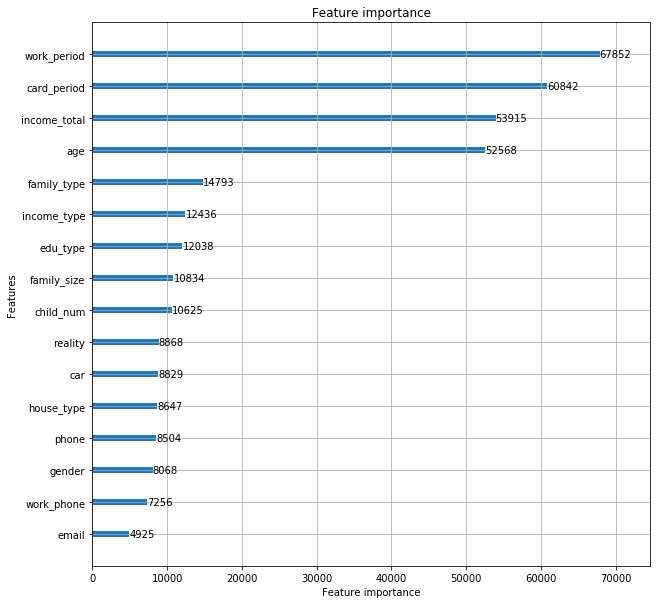

In [38]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 10))
plot_importance(lgbm, ax=ax)